# Neural Networks

[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/git/https%3A%2F%2Fgitlab.in2p3.fr%2Fenergy4climate%2Fpublic%2Feducation%2Fmachine_learning_for_climate_and_energy/master?filepath=book%2Fnotebooks%2F10_neural_networks.ipynb)

<div class="alert alert-block alert-warning">
    <b>Prerequisites</b>

- Matrix calculus
- Ordinary least squares
- Classification
</div>

<div class="alert alert-block alert-info">
    <b>Learning Outcomes</b>

- Neural network formalism
- Gradient descent and Backpropagation 
- From mathematical reasoning to empirical reasoning
</div>

## Introduction

In this notebook we are going to review the architecture of neural networks. Our goal is to build a neural network from scratch in order to study each component. 

Our task will be to recognize hand-written digits from the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset. The dataset consists in 70000 images of hand-written digits (from 0 to 9) collected in an American administration. This dataset is extremely popular in machine learning because it is small and clean with well identified categories.

As you can notice this data set is not related to climate or energy. We have indeed not found (yet) an equivalent data set that is small enough to quickly build and test our functions.

Here is an example of a sequence of numbers from this dataset

<img alt="weather" src="images/MnistExamples.png" width=400 style="float:center">



In this figure, you have no issue recognizing each digit: for each image, we immediately attach a label to our visual impression. Yet the task of writing a computer program that is able to identify each individual image seems complicated. Indeed, each digit can be written in many different ways and there are no clear logical instructions on how to proceed to identify the digit pattern.

Instead, we will follow our machine learning principle that we have been studying up to that point, i.e. learn the patterns from a training batch of images. The function we are trying to capture is

\begin{equation}
y = f(\mathbf x)
\end{equation}

where $y$ is the number of the digit written on the image and $\mathbf x$ is the content of the image.

In the example of handwritten digits, $\mathbf x$ is a multivariate vector that contains the grayscale value of each pixel of the image. Each image of this dataset is 28 pixels by 28 pixels and so each vector of the input space has dimension 784. We will use the convention that 0 is white and 1 is black. Any value between 0 and 1 is gray.

<div class="alert alert-block alert-warning">
    <b>Warning</b>
    
This dataset is great for teaching purposes but it may also convey the idea that neural networks are simple and always work. If you attack more serious problems in machine learning, you will soon realize that data sets are usually way more complicated 
</div>

## Building blocks of Neural Networks

### Neurons

In neural network terminology, we call $\mathbf x$ the input layer. Each component of $\mathbf x$ is called a **neuron**. The numerical value held by the neuron is called the **activation** of the neuron and can take any real number. For the input layer, the activation corresponds to the grayscale value of the corresponding pixel on the image: white pixels have activation equal to zero and black pixels have activation equal to 1. By convention, we say a neuron is *active* when it holds a positive value and *inactive* when it holds a negative value.

<img alt="weather" src="images/mnist_52.png" width=300 style="float:left">

\begin{align}
 \mathbf{x} &= \begin{bmatrix}
    x_1 \\
    x_2 \\
    x_3 \\
    \vdots \\
    x_n \\
  \end{bmatrix}
\end{align}



We want our neural network to predict a digit between 0 and 9. For now, we will consider the case where the output is a 10-dimensional vector $\mathbf y$. Each component $y_i$ of $\mathbf y$ can be interpreted as a likelihood that the input image corresponds to the digit $i-1$ (if we start indexing at 1). For instance it is very likely that 

\begin{align}
\mathbf y &= \begin{bmatrix}
    0.01 \\
    0.9 \\
    0.2 \\
    0.1 \\
    0.05 \\
    0.09 \\
    0.05 \\
    0.03 \\
    0.25 \\
    0.1 \\
  \end{bmatrix}
\end{align}

corresponds to a digit $i=1$. Note that the output does not have to be between 0 and 1. In this case, we simple select the neuron that is the most active.

Hence, the simplest neural network that one can build for this problem is summarized in the next figure:

<img alt="weather" src="images/nnet_mnist.png" width=300 style="float:center">


In the figure above, note that there are links between the input layer and the output layer. These links are here to illustrate the fact that each component of $\mathbf y$ is a function of all input variables. One simplest possible form to combine all inputs is the linear combination is

\begin{equation}
\hat y_i = \sum_j w_{ij} x_j + b_i
\end{equation}

that you can also put in matrix form

\begin{equation}
\hat {\mathbf y} = \mathbf W \mathbf x + \mathbf b
\end{equation}

where $\mathbf {W}$ is a matrix of the weights and $\mathbf b$ is the bias. When $\mathbf b=0$, you can think of this equation as a weighted sum of the input variables.

In order to train this network, you need to adjust the weights and biases in order to get the desired output $\mathbf y$. So far this is a multi-dimensional linear classification problem and you already know several methods to get the solution.

### From a linear model to a non-linear model

Let suppose now that you apply a non-linear function to the linear combination of the input variables.  We call these functions **activation function** since their role is to turn on or off a neuron. The key here (and in neural network in general) is that these functions must be non-linear functions of the input parameters (otherwise, we would simply do a linear regression). Again, we call the output of these function the activation of a neuron.

Let us introduce some possible (non-linear) activation functions.

### Heaviside function

The Heaviside function (or step function) is defined as

\begin{equation}
f(x)={\begin{cases}1,&x>0\\0,&x\leq 0\end{cases}}
\end{equation}

If we apply this function to the weighted sum, we then get a binary neuron: its activation state is either 0 or 1. In neural network terminology, the association of the weighted sum and Heaviside activation function is called a **Perceptron**.

#### Perceptrons
A perceptron is a function that maps an input vector $\mathbf x$ to  $f(\mathbf x)$ a single binary value:

\begin{equation}
f(\mathbf {x} )={\begin{cases}1&{\text{if }}\ \mathbf {w}^\top \mathbf {x} +b>0,\\0&{\text{otherwise}}\end{cases}}
\end{equation}

where $\mathbf {w}$ is a vector of of the weights and $b$ is the bias. As explained before, When $b=0$, you can think of this equation as a weighted sum of the input variables: if this sum is greater than zero, the output neuron is equal to 1. The bias shifts the decision boundary away from the origin and does not depend on any input value. So now, the activation state of a neuron can only be 0 or 1.

Since we have 10 output neurons, we need 10 perceptrons functions $f_i$, $i\in[0,9]$ and for each function we associate different weights and biases. Since we want to select only one category, we can set the output of the perceptron to 1 for the biggest $f_i(\mathbf x)$ and set the output to zero for all the other components. We are left with an optimization problem where we need to adjust these weights and biases to minimize the error in the image recognition.

> ***Question***
> - For this simple network, do you have an intuition for how the weights should combine to recognize a "0"? a "9"? (again think of the perceptron as a weighted sum)
>
> Let's check it with scikit-learn. For now we will let scikit-learn handle all the heavy lifting (i.e. finding the best set of weights and biases)

In [1]:
import gzip
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

# global variable
mnist_im_size = 28

In [2]:
def load_mnist_images(filename, num_images):
    '''
    return flatten images
    '''
    f = gzip.open(filename,'r')
    mnist_im_size = 28  
    f.read(16)
    buf = f.read(num_images*mnist_im_size**2)
    images = np.frombuffer(buf, dtype=np.uint8)/255.
    images = images.reshape(num_images, mnist_im_size**2)
    f.close()

    return images

In [3]:
def load_mnist_labels(filename, num_labels):

    f = gzip.open(filename,'r')
    f.read(8)
    buf = f.read(num_labels)
    labels = np.frombuffer(buf, dtype=np.uint8).astype(np.int64)
    f.close()
  
    return labels

In [4]:
def plot_mnist_image(image):
    
    n_side = int(np.sqrt(len(image)))
    plt.figure()
    plt.imshow(image.reshape((n_side,n_side)), cmap=plt.cm.gray_r)

In [5]:
dir_mnist = Path('data/mnist/')

n_train = 60000
file_train_images = 'train-images-idx3-ubyte.gz'
file_train_labels = 'train-labels-idx1-ubyte.gz'
X_train = load_mnist_images(Path(dir_mnist, file_train_images), n_train)
y_train = load_mnist_labels(Path(dir_mnist, file_train_labels), n_train)

n_test = 10000
file_test_images = 't10k-images-idx3-ubyte.gz'
file_test_labels = 't10k-labels-idx1-ubyte.gz'
X_test  = load_mnist_images(Path(dir_mnist, file_test_images), n_test)
y_test  = load_mnist_labels(Path(dir_mnist, file_test_labels), n_test)

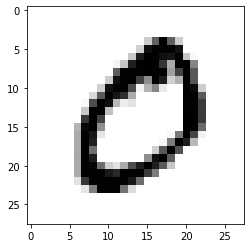

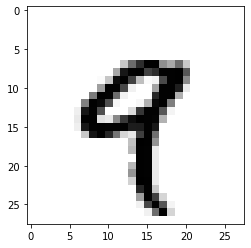

In [6]:
# An example of 0 and 9
plot_mnist_image(X_train[1])
plot_mnist_image(X_train[4])

In [7]:
from sklearn.linear_model import Perceptron
clf = Perceptron(tol=1e-3, random_state=0)
clf.fit(X_train, y_train)
clf.score(X_train, y_train)

0.8853833333333333

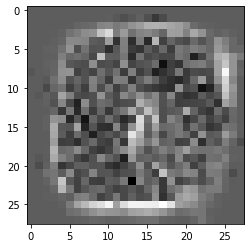

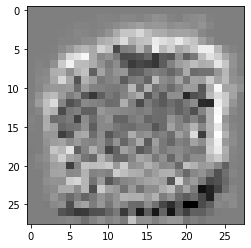

In [8]:
plot_mnist_image(clf.coef_[0])
plot_mnist_image(clf.coef_[9])

In the figure above, we plotted the weights for the class "0" and the weights for the class "9". You can compare these pattern with the actual "0" and "9" that we plotted above. It seems that the weights are trying to pick up the edges of the digit pattern. However, the signal seems very noisy. We are actually moving away from linear methods (maximum interpretability) and we are trading interpretability against performance. Note that the score of this simple perceptron model is 88% (correctly classified digits). 

Perceptrons are highly non linear functions: when the weighted sum is close the threshold, a small modification of the input parameter will introduce a change of category. Moreover, perceptrons are not continuous functions and so they are hard to differentiate (optimization perspective). In order to overcome these limitations, let us introduce two other popular activation functions: the sigmoid and the rectifier (ReLU for Rectified Linear Unit)

### Sigmoid activation function

The sigmoid function is a good alternative to the Heaviside because the function and its derivative are continuous. (cf. classification)


> ***Question***
>
> - Can you recall the main properties of the sigmoid function? What is the role of the weights and biases?

In [9]:
def sigmoid(x):                                        
    return 1 / (1 + np.exp(-x))

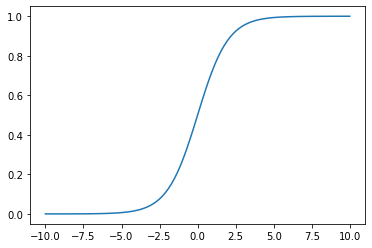

In [10]:
x = np.linspace(-10,10,100)
plt.plot(x,sigmoid(x))

### ReLU activation function

The ReLU activation function is defined as

\begin{equation}
f(x)=\max(0,x)
\end{equation}

This function will "activate" a neuron only if the input value is positive. Note that with this activation function, the activation level is not restricted to be between 0 an 1. Advantages of ReLU are that 
- they are cheap to compute (later on, we are going to use millions of these units so we need to take that into account)
- although its derivative is not continuous, is has nice properties for optimization purposes (the gradient does not vanish for large values of x, more on that later)

In [11]:
def relu(x):                                        
    return np.maximum(0,x)

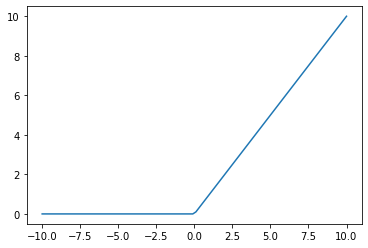

In [12]:
plt.plot(x,relu(x))

### Notation simplification

As the ordinary least square problem, we will absorb the bias into the weight matrix. To do so, we need to append a "1" to the $\mathbf x$ vector. The write the weighted sum

\begin{equation}
\mathbf z = \mathbf W \mathbf x
\end{equation}

where the last column of $\mathbf W$ is equal to $\mathbf b$, and the dimension of $\mathbf x$ is now $n+1$.

### Cost function

In order to asses the performance of our network, we introduce the cost function

\begin{equation}
C = \frac{1}{M}\sum_{m} \| \mathbf y_m - \mathbf {\hat y}_m \|^2\, ,
\end{equation}
where $\mathbf y_m$ is the true output of the $m^{th}$ sample and $\mathbf {\hat y}_m$ is our estimated value of the output for that sample. The sum spans the entire training set of size $M$. Our task here is to find the best value of the parameters that minimize that cost function.

For an activation function $\sigma$, the cost function for an individual input writes

\begin{equation}
C_m = \| \mathbf y_m - \sigma (\mathbf W \mathbf x_m) \|^2\, .
\end{equation}


### Iterative procedure


In order to illustrate the iterative procedure and the gradient descent, let's consider a simpler form of the cost function

\begin{equation}
C = (y - \sigma (\mathbf w^\top \mathbf x) )^2\, ,
\end{equation}
where $y$ is a scalar and $\mathbf w$  and $\mathbf x$ are vectors.

We want to find the set of weights and biases that minimize the cost function $C$. The cost function is minimum when 

\begin{equation}
\frac{d C}{d \mathbf W} = 0
\end{equation}


> ***Question***
> 
> - Compute $dC/d \mathbf w$

This non linear equation has no closed form solution so we will instead use an iterative procedure.

We start from a first guess for the weights $\mathbf w^{(0)}$. For this value of the weights, we compute the value of the cost function $C$. We then add increments 

\begin{equation}
\mathbf w^{(1)} = \mathbf w^{(0)} + \delta \mathbf w^{(0)}
\end{equation}

The cost function will vary by an amount 

\begin{align}
\Delta C &= C\left(\mathbf w^{(1)}\right) - C\left(\mathbf w^{(0)}\right)\\
& = C\left(\mathbf w^{(0)} + \delta \mathbf w^{(0)}\right) - C\left(\mathbf w^{(0)}\right)\\
 & \simeq \left.\frac{d C}{d \mathbf w}\right|_{\mathbf w^{(0)}} \delta \mathbf w^{(0)}
\end{align}

> ***Question***
>
>- Show that if we choose 
\begin{equation}
\delta \mathbf w = - \lambda  \left[\frac{d C}{d \mathbf w}\right]^\top
\end{equation}
> then at each iteration, we have $\Delta C < 0$. (With $\lambda$ a positive number.)


The parameter $\lambda$ is called the **learning rate**.

So in the limit where linearity holds we can compute the little increments in the weights and biases that ensure that the cost function will decrease. This method is called the **Gradient descent**.

1d

### Illustration of the gradient descent

We illustrate the gradient descent technique in the next figure for the case where $\mathbf w$ is dimension 2. The cost function $C$ is plotted with contours: it is minimum in the yellow area. The initial guess $\mathbf w^{(0)}$ is plotted with the red dot. The value of $\mathbf w$ for which $dC/d\mathbf w = 0$ is plotted with a red cross.


<img alt="weather" src="images/gradient_descent.png" width=400 style="float:center">


> ***Question***
>
> - What is the problem if $\lambda$ is too small? too big?
> - What happens if the cost function is a complicated function of $\mathbf w$ with many local minima?

In practice, the gradient descent method works well but is very slow to converge. There are other methods that have better convergence properties for this iterative process: [Newton-Raphson](https://en.wikipedia.org/wiki/Newton%27s_method), [Conjugate gradient](https://en.wikipedia.org/wiki/Conjugate_gradient_method), etc (see turorial)

### Hidden layers

In the perceptron model, there is only a limited amount of complexity that you can model between the input and the output. This complexity is limited by the fact that two variables interact via the weighted sum and then via the sigmoid function. One way to overcome this limitation is to add one or more **hidden layers** of neurons between the input and output layers.


The reason to add these layers is break down the problem into multiple small task: for the digit recognition that could be "pick and edge", "find a strait line".

<img alt="weather" src="images/hidden_layer.png" width=400 style="float:center">

The figure above is an illustration of the simplest possible architecture of neural network: it comprises an input layer of $n$ neurons, one hidden layer, and one output layer. For historical reasons, neural networks are sometimes called multi-layer perceptron (MLP) even if the activation functions in the hidden layers are not a perceptron.

### Universal approximation theorem

Why adding more layers help? 

The universal approximation theorem  states that a feedforward network with at least one hidden layer can approximate any continuous function with an error that can be made as small as we want by adding neurons in the hidden layer.

This theorem is extremely powerful because if there is indeed a function

\begin{equation}
\mathbf y = f(\mathbf x)
\end{equation}

between an input vector $\mathbf x$ and an output vector $\mathbf y$. Then there exists a neural network that can approximate this function with an arbitrarily small error. Hence, neural networks are "universal" tools (can be used every time we believe there exists a mapping: digit recognition, classification, uncover physical laws, etc.)

One caveat however is that, if we are guaranteed the existence of a network, we have no guidance on how to find such network. We need to build a strategy to find the weights and biases to find that optimal solution.

### Training network: backpropagation




Let's consider the case where we have more than one hidden layer. We write with a subscript $\mathbf a^l$ the activation in the $l^{th}$ layer. So we have

\begin{equation}
\mathbf a^l = \sigma \left( \mathbf W^l \mathbf a^{l-1} \right)
\end{equation}

with $\mathbf W^l$ the matrix of weights to compute the activation in layer $l$. Remember also that we included the bias in the last column of $\mathbf W^l$. For now, we will consider that the input in the first layer: $\mathbf x = \mathbf a^0$ and the output are the activation of the last layer $\mathbf y = \mathbf a^L$. In this case, there are $L+1$ layers.



As before, we also note 

\begin{equation}
\mathbf z^l = \mathbf W^l \mathbf a^{l-1}
\end{equation}

the weighted sum in layer $l$.

> ***Question***
>
> - If there are $p$ neurons in layer $l-1$ and $q$ neurons in layer $l$, what is the dimension of each of the terms in the equation above? (Hint: don't forget about the bias)

The cost function is 

\begin{equation}
C = \frac{1}{M}\sum_{m} \| \mathbf y_m - \mathbf a^L_m \|^2\, ,
\end{equation}

where the sum is again over all input data. We want to compute the derivative of this cost function with respect to **all** weights and biases in the network in order to use the gradient descent algorithm

\begin{equation}
\frac{\partial C}{\partial \mathbf W^l} \, ,
\end{equation}
for all $l$

Chain rule

\begin{equation}
\frac{\partial C}{\partial \mathbf W^l} = \frac{\partial C}{\partial \mathbf z^l} \frac{\partial \mathbf z^l}{\partial \mathbf W^l}
\end{equation}


Let us introduce the notation

\begin{equation}
\mathbf \delta^l = \frac{\partial C}{\partial \mathbf z^l}
\end{equation}

which is a row vector according to our numerator layout convention

Let's first derive $\mathbf \delta^L$ in the last layer. For one individual sample

\begin{equation}
C = ( \mathbf y - \sigma(\mathbf z^L))^\top ( \mathbf y - \sigma (\mathbf z^L))\, ,
\end{equation}

so 

\begin{equation}
\mathbf \delta^L = \frac{\partial C}{\partial \mathbf z^l} = -2( \mathbf y - \sigma(\mathbf z^L))^\top \Sigma' (\mathbf z^L))\, ,
\end{equation}


We have not seen the derivative of a vector by a matrix:

\begin{equation}
\frac{\partial \mathbf z^l}{\partial \mathbf W^l} = \frac{\partial }{\partial \mathbf W^l}  \mathbf W^l \mathbf a^{l-1}
\end{equation}

is a tensor of order 3 with a lot of zeros. The above equation simplifies in

\begin{equation}
\frac{\partial C}{\partial \mathbf W^l} = \mathbf a^{l-1} \delta^l
\end{equation}


> ***Question***
>
> - What is the physical interpretation of this derivative?
> - *(Optional)* Verify that $\frac{\partial C}{\partial \mathbf W^l}$ is the same dimension as ${\mathbf W^l}^\top$

Recurrence relation

\begin{align}
\mathbf \delta^l &= \frac{\partial C}{\partial \mathbf z^{l+1}} \frac{\partial \mathbf z^{l+1}}{\partial \mathbf z^{l}}\\
&= \mathbf \delta^{l+1} \frac{\partial \mathbf z^{l+1}}{\partial \mathbf z^{l}}
\end{align}

Moreover we have

\begin{equation}
\mathbf z^{l+1} = \mathbf W^{l+1} \mathbf a^l = \mathbf W^{l+1} \sigma(\mathbf z^l)
\end{equation}

so 

\begin{equation}
\frac{\partial \mathbf z^{l+1}}{\partial \mathbf z^{l}} = \mathbf W^{l+1} \Sigma'(\mathbf z^l)
\end{equation}

where $\Sigma'$ is a matrix with diagonal entries which are $\sigma'(\mathbf z^l)$

So we have

\begin{equation}
\mathbf \delta^l = \mathbf \delta^{l+1} \mathbf W^{l+1} \Sigma'(\mathbf z^l)
\end{equation}

> ***Question***
> 
> - Suppose that there are $p$ neurons in layer $l$ and $q$ neurons in layer $l+1$. What is the dimension of all the terms in the equation above?
> - Since $\Sigma'$ is a diagonal matrix, how are you going to compute the product of these 3 elements in a computer program?

<div class="alert alert-block alert-info">
    <b>Main equations</b>

- \begin{equation}
\frac{\partial C}{\partial \mathbf W^l} = \mathbf a^{l-1} \delta^l
\end{equation}
    
- \begin{equation}
\mathbf \delta^l = \mathbf \delta^{l+1} \mathbf W^{l+1} \Sigma'(\mathbf z^l)
\end{equation}
    
    
- \begin{equation}
\mathbf \delta^L = -2( \mathbf y - \sigma(\mathbf z^L))^\top \Sigma' (\mathbf z^L))\, ,
\end{equation}
</div>

Let's try to implement all these formula in the tutorial see if we can make sense of it.

References

- Deep Learning, Goodfellow Bengio Courville (2016), [Chap 6](https://www.deeplearningbook.org/contents/mlp.html)

***
## Credit

[//]: # "This notebook is part of [E4C Interdisciplinary Center - Education](https://gitlab.in2p3.fr/energy4climate/public/education)."
Contributors include Bruno Deremble and Alexis Tantet.

<br>

<div style="display: flex; height: 70px">
    
<img alt="Logo LMD" src="images/logos/logo_lmd.jpg" style="display: inline-block"/>

<img alt="Logo IPSL" src="images/logos/logo_ipsl.png" style="display: inline-block"/>

<img alt="Logo E4C" src="images/logos/logo_e4c_final.png" style="display: inline-block"/>

<img alt="Logo EP" src="images/logos/logo_ep.png" style="display: inline-block"/>

<img alt="Logo SU" src="images/logos/logo_su.png" style="display: inline-block"/>

<img alt="Logo ENS" src="images/logos/logo_ens.jpg" style="display: inline-block"/>

<img alt="Logo CNRS" src="images/logos/logo_cnrs.png" style="display: inline-block"/>
    
</div>

<hr>

<div style="display: flex">
    <a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/"><img alt="Creative Commons License" style="border-width:0; margin-right: 10px" src="https://i.creativecommons.org/l/by-sa/4.0/88x31.png" /></a>
    <br>This work is licensed under a &nbsp; <a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/">Creative Commons Attribution-ShareAlike 4.0 International License</a>.
</div>